In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score

In [2]:
data_health=pd.read_csv("framingham.csv")
data_health.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Missing Data

In [3]:
data_health.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Define X and Y

In [4]:
X=data_health.drop("TenYearCHD",axis=1)
y=data_health["TenYearCHD"]

Split test and train X,y

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

Logistic Regression

In [6]:
from sklearn.impute import SimpleImputer

In [8]:
sc_logistic=SimpleImputer()
X_train_logistic=sc_logistic.fit_transform(X_train)
X_test_logistic=sc_logistic.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train_logistic,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Predict Results

In [10]:
logreg.predict(X_test_logistic)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
accuracy_score(y_test , logreg.predict(X_test_logistic))

0.8561320754716981

ROC Curve 

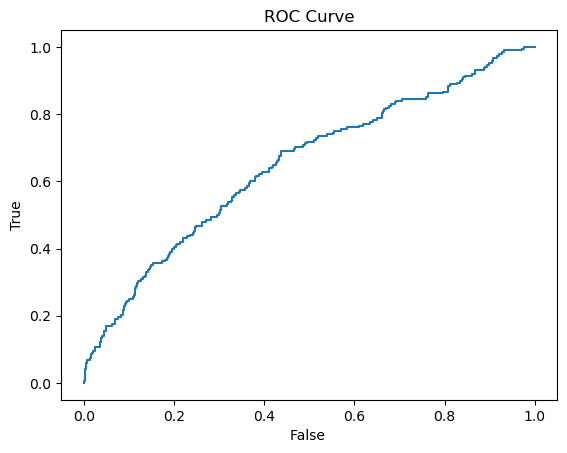

In [12]:

from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test_logistic)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True')
plt.xlabel('False ')
plt.title("ROC Curve")
plt.show()

Desicion Tree Regressor model

In [13]:
desctreereg=DecisionTreeRegressor()
y=y.ravel()
y_train=y_train.ravel()
desctreereg.fit(X_train_logistic,y_train)
y_des=desctreereg.predict(X_train_logistic)
accuracy_score(y_test , desctreereg.predict(X_test_logistic))



0.7444968553459119

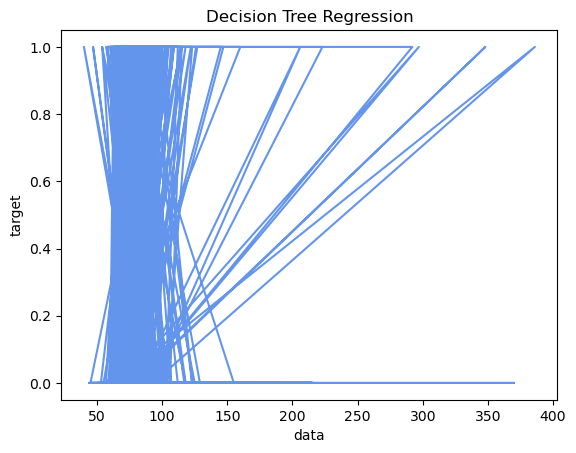

In [32]:

plt.plot(X_test_logistic[:,-1], desctreereg.predict(X_test_logistic), color="cornflowerblue")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")

plt.show()

In [19]:
randomforestreg=RandomForestClassifier(n_estimators=1,random_state=0)
randomforestreg.fit(X_train_logistic,y_train)
randomforestreg.predict(X_test_logistic)
accuracy_score(y_test , randomforestreg.predict(X_test_logistic))

0.7374213836477987

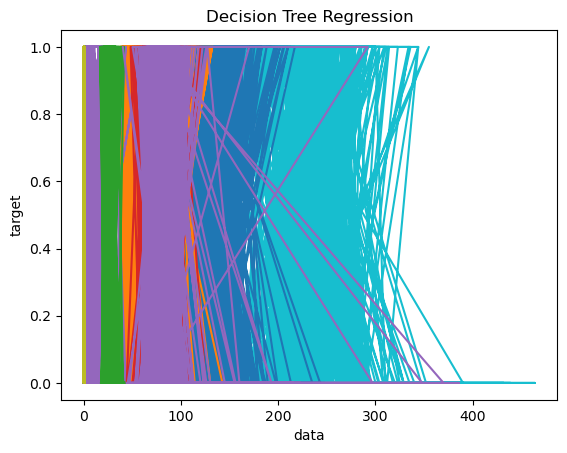

In [30]:

plt.plot(X_test_logistic, randomforestreg.predict(X_test_logistic))
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.show()

In [27]:
svcreg=SVR(kernel='poly')
svcreg.fit(X_train_logistic,y_train)
y_svc=svcreg.predict(X_test_logistic)
y_svc

array([0.09959846, 0.09865141, 0.09851292, ..., 0.0994721 , 0.10052063,
       0.09931476])

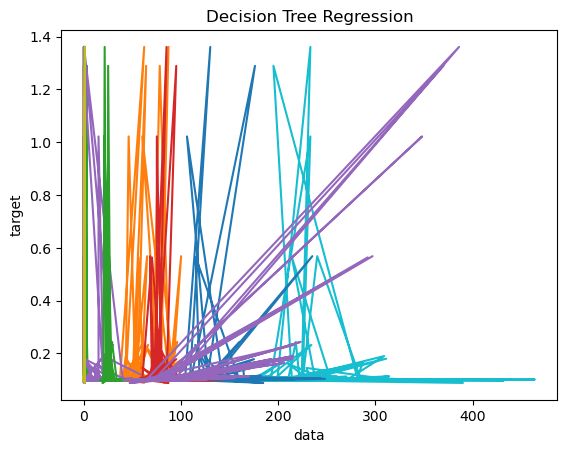

In [29]:
plt.plot(X_test_logistic, y_svc)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")

plt.show()